In [12]:
import pandas as pd

# Fuentes de datos
data_test = pd.read_csv('../datos/test.csv')
data_train = pd.read_csv('../datos/train.csv')
data_labels = pd.read_csv('../datos/gender_submission.csv')

df_merged = pd.merge(left=data_test, right=data_labels, on='PassengerId', how='left')

list_data_total = [data_train, df_merged]

df_total = pd.concat(list_data_total, ignore_index=True)

In [ ]:
# Inspección general EDA

df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [15]:
df_total.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [19]:
(df_total.isna().sum()/1309)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [27]:
# Como el valor de edad esta perdido un 25%, lo reemplazamos con median, para Cabin si lo obviamos porque es el valor de valores nulos es muy grande.
df_total['Age_Missing'] = df_total['Age'].isnull().astype(int)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_total['Age'] = imputer.fit_transform(df_total[['Age']])


In [31]:
df_prepared = df_total.drop(columns='Cabin')

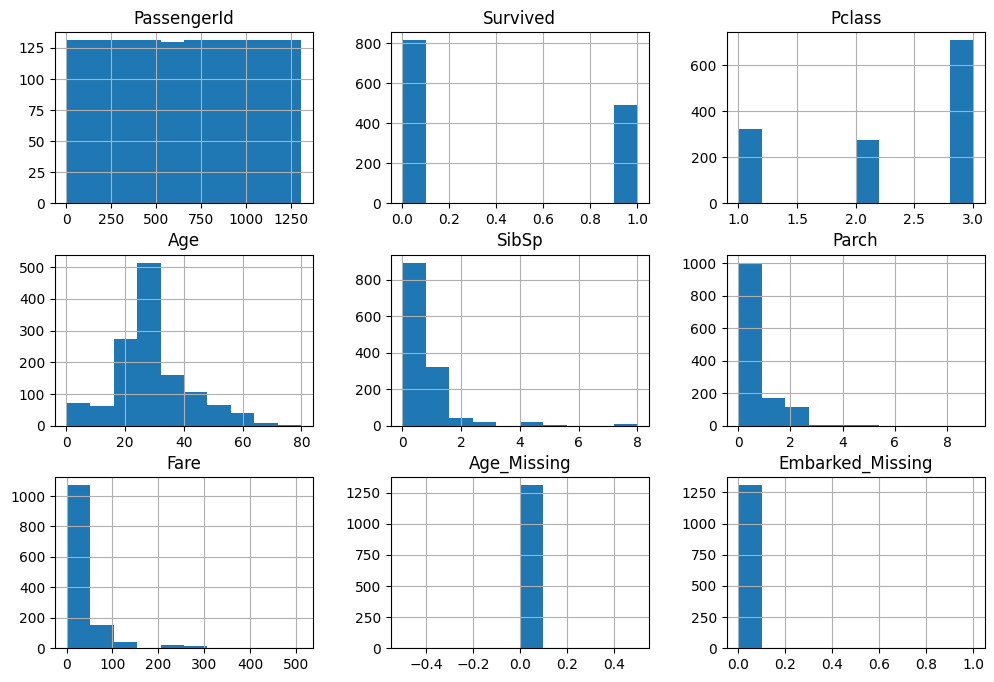

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df_prepared.hist(figsize=(12 , 8))
plt.show()